In [3]:
%pip install esa-apex-algorithms openeo pandas matplotlib

In [4]:
import esa_apex_toolbox
import openeo
import pandas as pd

In [4]:
from esa_apex_toolbox.algorithms import GithubAlgorithmRepository

# Discover algorithms

We use the Python API for the APEx algorithm catalog to easily look up available algorithms and there metadata.

This avoids having to copy paste algorithm links.

In [5]:
repo = GithubAlgorithmRepository(
            owner="ESA-APEx",
            repo="apex_algorithms",
            folder="algorithm_catalog",
        )

In [7]:
repo.list_algorithms()

['wind_turbine',
 'eurac_pv_farm_detection',
 'gep_bas',
 'gep_ost',
 'sar_coin',
 'snap_insar_sentinel1_iw_slc',
 'bap_composite',
 'biopar',
 'fusets_mogpr',
 'max_ndvi',
 'max_ndvi_composite',
 'parcel_delineation',
 'random_forest_firemapping',
 'sentinel1_stats',
 'variabilitymap',
 'worldcereal_crop_extent',
 'worldcereal_crop_type',
 'worldcover_statistics',
 'worldagrocommodities']

In [16]:
worldcover_stats = repo.get_algorithm('worldcover_statistics')
worldcover_stats

Algorithm(id='worldcover_statistics', title='Land cover statistics based on ESA WorldCover data for 2021, provided by Terrascope.', description='For a given geometry or set of geometries, computes percentage landcover for 2021.', udp_link=UdpLink(href='https://raw.githubusercontent.com/ESA-APEx/apex_algorithms/refs/heads/main/algorithm_catalog/vito/worldcover_statistics/openeo_udp/worldcover_statistics.json', title='openEO Process Definition'), service_links=[ServiceLink(href='https://openeofed.dataspace.copernicus.eu', title='openEO platform')], license=None, organization='Terrascope')

# Run the algorithm in openEO

We want to run an algorithm in openEO, so connect to the backend.

## Authentication

Authentication still requires that you generate a bearer token outside of this JupyterLite instance.
The `authenticate_oidc`method can be used to create a token, and it can be printed via:
`connection.auth.bearer`.

In [11]:
url = "https://openeo-staging.dataspace.copernicus.eu"
connection = openeo.connect(url)

In [12]:
connection.authenticate_bearer_token("oidc/CDSE-staging/eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJqV0RSMU9tTVJmdXRNRmdnc3JVVmpvZzFSSVpGMS1KdnAxemREVFo5WWNZIn0.eyJleHAiOjE3NjIyMjExODUsImlhdCI6MTc2MjE5MjM4NSwiYXV0aF90aW1lIjoxNzU1MDY0ODIyLCJqdGkiOiI0MmUwMTBkNS1mYjVhLTQxY2ItOTgxYS02MmMwNzdiNTMzZWIiLCJpc3MiOiJodHRwczovL2NkYXNpZC5jbG91ZGZlcnJvLmNvbS9hdXRoL3JlYWxtcy9DREFTIiwic3ViIjoiMjczOTQxYzgtMDBlMi00Y2VjLTgxYjUtODk4NzU2ZGViMDZmIiwidHlwIjoiQmVhcmVyIiwiYXpwIjoic2gtYjFjM2E5NTgtNTJkNC00MGZlLWEzMzMtMTUzNTk1ZDFjNzFlIiwic2Vzc2lvbl9zdGF0ZSI6ImE1OWMyNjU3LWZiNTAtNGQ1NS1iMGZkLTMyYzEzMGYyZDkyNCIsImFsbG93ZWQtb3JpZ2lucyI6WyJodHRwOi8vbG9jYWxob3N0OjEwMjQiLCJodHRwczovL29wZW5lby5kYXRhc3BhY2UuY29wZXJuaWN1cy5ldSIsImh0dHBzOi8vb3BlbmVvLmNyZW8udml0by5iZSIsImh0dHBzOi8vZWRpdG9yLm9wZW5lby5vcmciLCJodHRwczovL29wZW5lby1zdGFnaW5nLmRhdGFzcGFjZS5jb3Blcm5pY3VzLmV1IiwiaHR0cHM6Ly9vcGVuZW8tc3RhZ2luZy5jcmVvLnZpdG8uYmUiLCJodHRwczovL29wZW5lby1kZXYuY3Jlby52aXRvLmJlIl0sInNjb3BlIjoib3BlbmlkIG9mZmxpbmVfYWNjZXNzIGVtYWlsIGVvZGF0YS1yZXNvdXJjZSBwcm9maWxlIGFkZGl0aW9uYWxfc2NvcGUiLCJzaWQiOiJhNTljMjY1Ny1mYjUwLTRkNTUtYjBmZC0zMmMxMzBmMmQ5MjQiLCJvcmdhbml6YXRpb25zIjpbImRlZmF1bHQtMjczOTQxYzgtMDBlMi00Y2VjLTgxYjUtODk4NzU2ZGViMDZmIl0sInVzZXJfY29udGV4dF9pZCI6IjgzOTZhM2E4LTFjOGYtNGEzNy05NDA0LWIwZDRkZWFmMjAxZSIsImNvbnRleHRfcm9sZXMiOnt9LCJjb250ZXh0X2dyb3VwcyI6WyIvYWNjZXNzX2dyb3Vwcy91c2VyX3R5cG9sb2d5L2NvcGVybmljdXNfZ2VuZXJhbC8iLCIvZGVmYXVsdC0yNzM5NDFjOC0wMGUyLTRjZWMtODFiNS04OTg3NTZkZWIwNmYvIiwiL29yZ2FuaXphdGlvbnMvZGVmYXVsdC0yNzM5NDFjOC0wMGUyLTRjZWMtODFiNS04OTg3NTZkZWIwNmYvcmVndWxhcl91c2VyLyJdLCJ1c2VyU2VjdG9yIjoiVG91cmlzbSIsInByZWZlcnJlZF91c2VybmFtZSI6Implcm9lbi5kcmllc0B2aXRvLmJlIiwidXNlcl9jb250ZXh0IjoiZGVmYXVsdC0yNzM5NDFjOC0wMGUyLTRjZWMtODFiNS04OTg3NTZkZWIwNmYiLCJlbWFpbCI6Implcm9lbi5kcmllc0B2aXRvLmJlIn0.1qxZy6WF5gXmQKIPwBT56MtYLrrnH84-mCqliy7iQWbY2ZaEyfvVF9hlibTAJDZ0lLPcRLdq40Ghr8x4Mj1nTx09qh2SDvqV-dJPc1Ih7XBBFZBQlLSJLahVPOkf-3iAXtENbduzav5Rjzw35GYRGi38Yh4HSezw_-50anytr4aCztqJyomfJFspe2LpUiuv_2rKSzgMt_uWAB54xJr0vJjbklLZqido0z10E72cvazTnIERdLoo1BtMnNXIzrXYVmLLnm-XltZ7Ff_gFehbMzkJU7inOeD0Z0YLEYAL2-Nk7hw74oe_t2YcCOwwshMYngiGNXzhVtyEQjtM_0tflw")

<Connection to 'https://openeo-staging.dataspace.copernicus.eu/openeo/1.2/' with BearerAuth>

In [20]:
import json

with open("senales.geojson", "r") as f:
    senales_aoi = json.load(f)

In [27]:


connection.datacube_from_process(
    namespace = worldcover_stats.udp_link.href,
    process_id = worldcover_stats.id,
    geometries = senales_aoi
).save_result(format="CSV").execute_batch("worldcover_stats_senales.csv")

0:00:00 Job 'j-2511032019204e568d929848c29e5097': send 'start'
0:00:14 Job 'j-2511032019204e568d929848c29e5097': created (progress 0%)
0:00:19 Job 'j-2511032019204e568d929848c29e5097': created (progress 0%)
0:00:26 Job 'j-2511032019204e568d929848c29e5097': created (progress 0%)
0:00:34 Job 'j-2511032019204e568d929848c29e5097': created (progress 0%)
0:00:44 Job 'j-2511032019204e568d929848c29e5097': created (progress 0%)
0:00:56 Job 'j-2511032019204e568d929848c29e5097': running (progress 8.2%)
0:01:12 Job 'j-2511032019204e568d929848c29e5097': running (progress 10.3%)
0:01:31 Job 'j-2511032019204e568d929848c29e5097': running (progress 12.8%)
0:01:55 Job 'j-2511032019204e568d929848c29e5097': finished (progress 100%)


<BatchJob job_id='j-2511032019204e568d929848c29e5097'>

In [5]:
df = pd.read_csv("worldcover_stats_senales.csv")
df.date = pd.to_datetime(df.date)
df.set_index(["date","feature_index"],inplace=True)
df

,,treecover,shrubland,grassland,cropland,builtup,bare/sparse vegetation,snow and ice,water,herbaceous wetland,mangroves,moss and lichen
date,feature_index,,,,,,,,,,,
2021-01-01 00:00:00+00:00,0,0.282781,0.00012,0.44879,0.000823,0.004184,0.073633,0.090438,0.001435,0.000002,0.0,0.097795


Matplotlib is building the font cache; this may take a moment.


array([<Axes: ylabel='(2021-01-01 00:00:00+00:00, 0)'>], dtype=object)

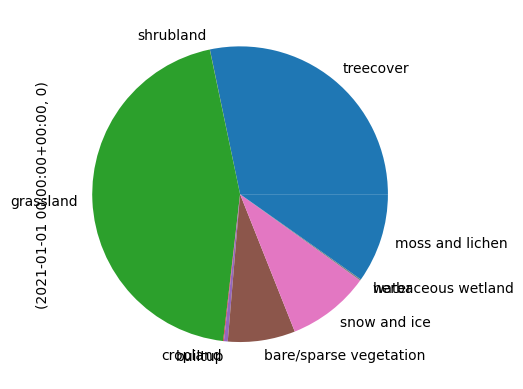

In [6]:
df.T.plot.pie(subplots=True, legend=False)